<center><h1>![seaborn](images/seaborn.png)Seaborn



# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the :func:`distplot` function. By default, this will draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE). 

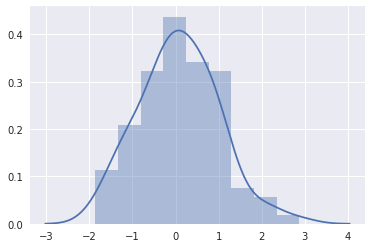

In [2]:
x = np.random.normal(size=100)
sns.distplot(x);

### Histograms

Histograms are likely familiar, and a ``hist`` function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the :func:`rugplot` function, but it is also available in :func:`distplot`:

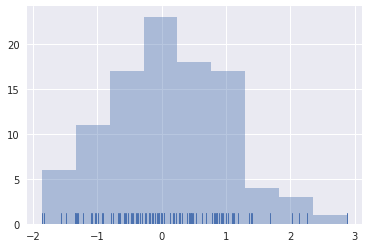

In [7]:
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. :func:`distplot` uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

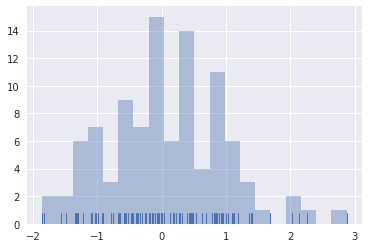

In [8]:
sns.distplot(x, bins=20, kde=False, rug=True);

### Kernel density estimaton


The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

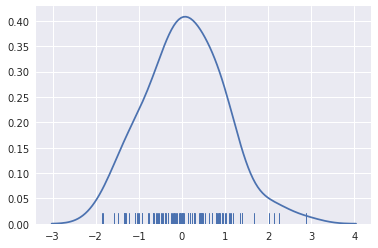

In [9]:
sns.distplot(x, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

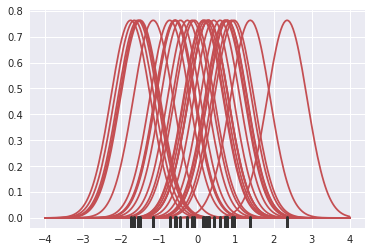

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

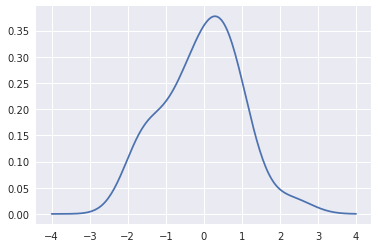

In [11]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the :func:`kdeplot` function in seaborn, we get the same curve. This function is used by :func:`distplot`, but it provides a more direct interface with easier access to other options when you just want the density estimate:

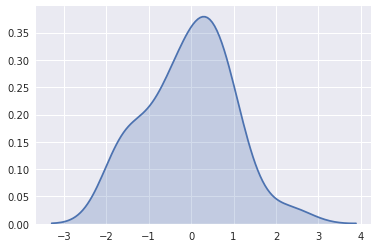

In [12]:
sns.kdeplot(x, shade=True);

The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

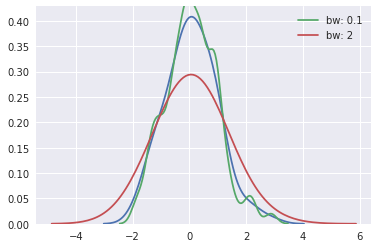

In [3]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.1")
sns.kdeplot(x, bw=1, label="bw: 2")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

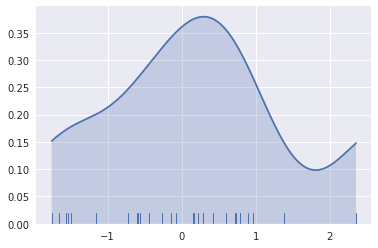

In [14]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

### Fitting parametric distributions


You can also use :func:`distplot` to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

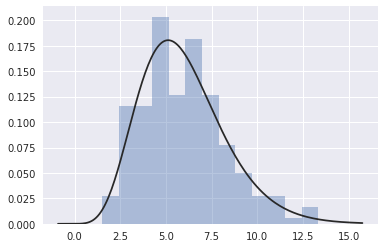

In [6]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the :func:`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [4]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib ``plt.scatter`` function, and it is also the default kind of plot shown by the :func:`jointplot` function:

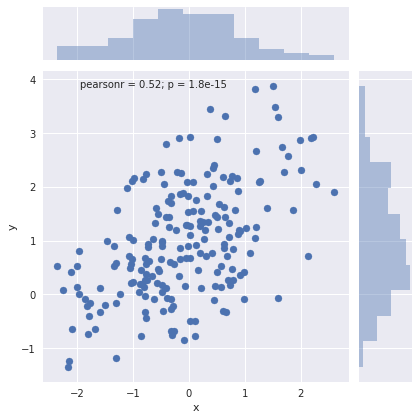

In [8]:
sns.jointplot(x="x", y="y", data=df);

### Hexbin plots

The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib ``plt.hexbin`` function and as a style in :func:`jointplot`. It looks best with a white background:

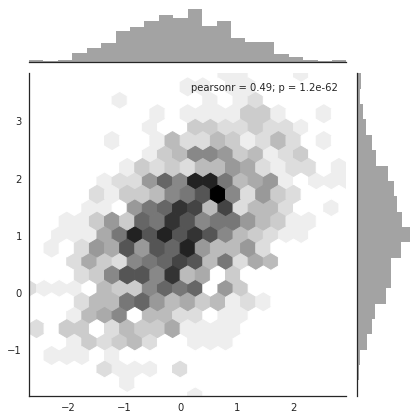

In [9]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Kernel density estimation

It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in :func:`jointplot`:

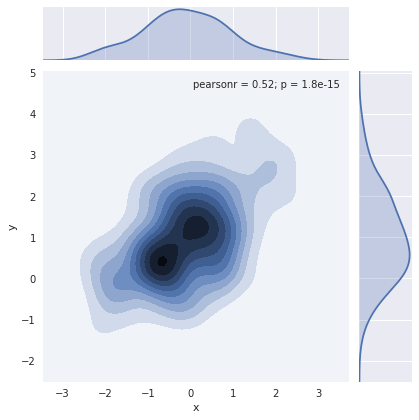

In [10]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

You can also draw a two-dimensional kernel density plot with the :func:`kdeplot` function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the :func:`jointplot` function manages its own figure:

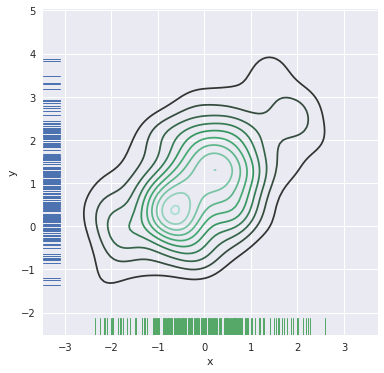

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

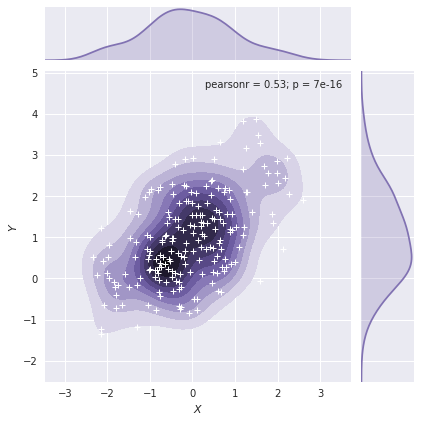

In [22]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the :func:`pairplot` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

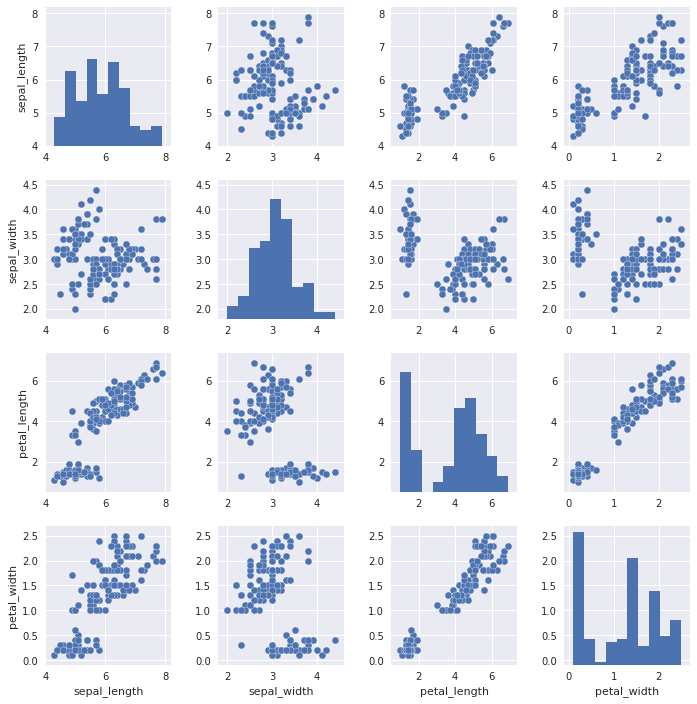

In [11]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between :func:`jointplot` and :class:`JointGrid`, the :func:`pairplot` function is built on top of a :class:`PairGrid` object, which can be used directly for more flexibility:

/home/jlaforet/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


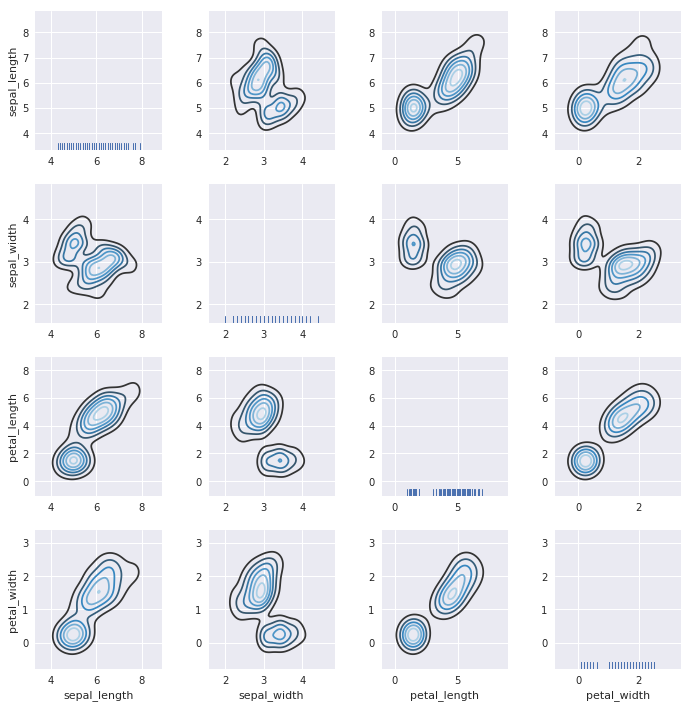

In [13]:
g = sns.PairGrid(iris)
g.map_diag(sns.rugplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Plotting with categorical data

We :ref:`previously <regression_tutorial>` learned how to use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship, which we will discuss in this tutorial.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions :func:`swarmplot` and :func:`stripplot`, the second includes :func:`boxplot` and :func:`violinplot`, and the third includes :func:`barplot` and :func:`pointplot`. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between :func:`regplot` and :func:`lmplot`, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level :func:`factorplot`, which combines these functions with a :class:`FacetGrid` to apply a categorical plot across a grid of figure panels.

It is easiest and best to invoke these functions with a DataFrame that is in ["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) format, although the lower-level functions also accept wide-form DataFrames or simple vectors of observations. See below for examples.

In [6]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Categorical scatterplots

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses :func:`stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

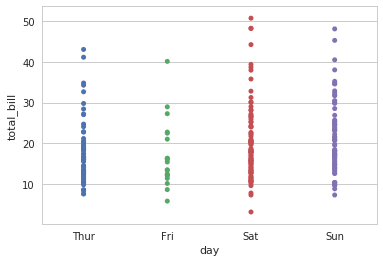

In [7]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

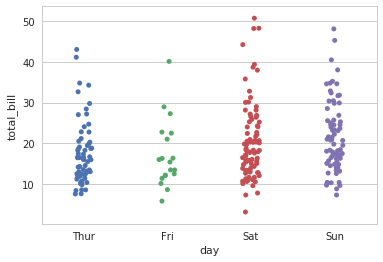

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True); 

A different approach would be to use the function :func:`swarmplot`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

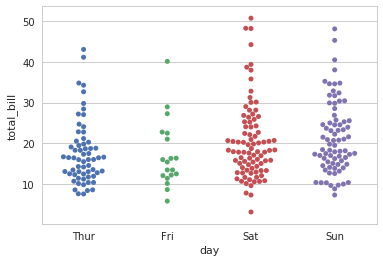

In [30]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

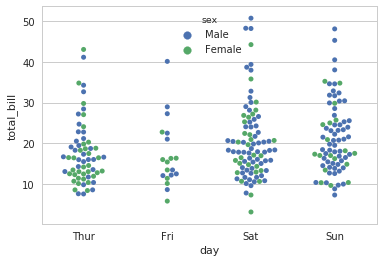

In [31]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

### Boxplots


The first is the familiar :func:`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

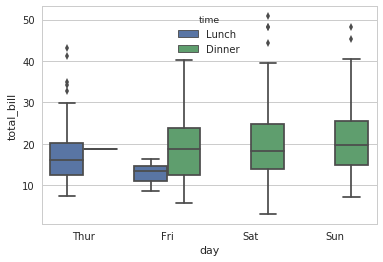

In [34]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

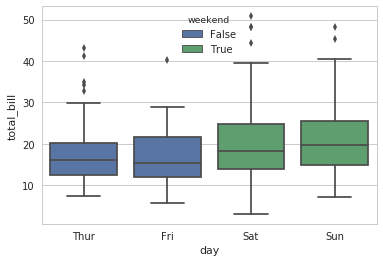

In [35]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

### Violinplots

A different approach is a :func:`violinplot`, which combines a boxplot with the kernel density estimation procedure described in the :ref:`distributions <distribution_tutorial>` tutorial:

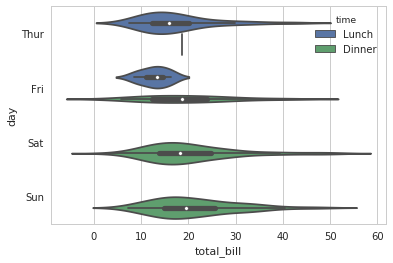

In [36]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

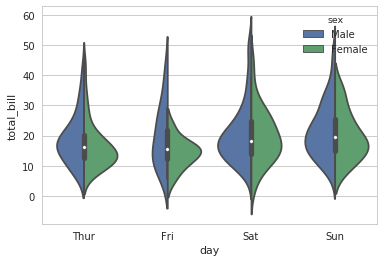

In [38]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Statistical estimation within categories
----------------------------------------

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the :func:`barplot` function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

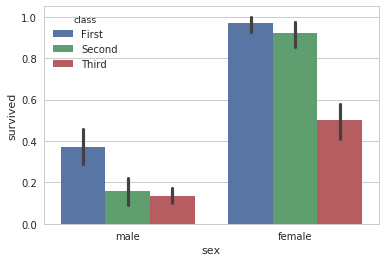

In [41]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

### Point plots


An alternative style for visualizing the same information is offered by the :func:`pointplot` function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

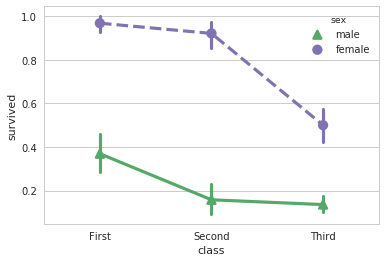

In [45]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function :func:`factorplot`, which combines these functions with a :func:`FacetGrid` to add the ability to examine additional categories through the larger structure of the figure. By default, :func:`factorplot` produces a :func:`pointplot`:

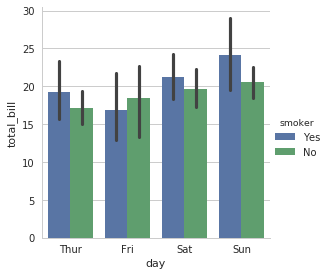

In [50]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

The main advantage of using a :func:`factorplot` is that it is very easy to "facet" the plot and investigate the role of other categorical variables:

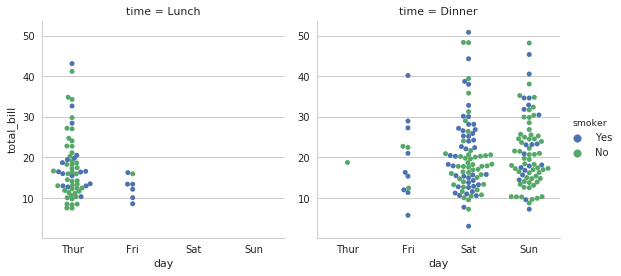

In [51]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

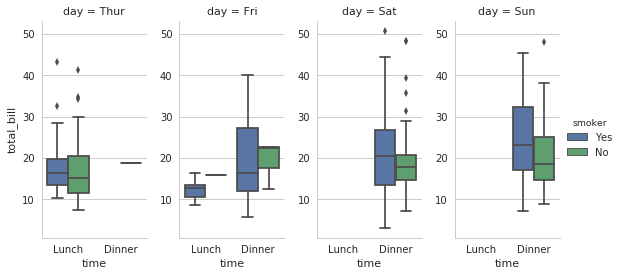

In [52]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

# Visualizing linear relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We :ref:`previously discussed <distribution_tutorial>` functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use [statsmodels](http://statsmodels.sourceforge.net). The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [8]:
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, :func:`regplot` and :func:`lmplot` are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

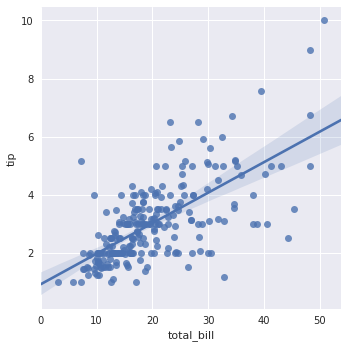

In [9]:
sns.lmplot(x="total_bill", y="tip", data=tips);

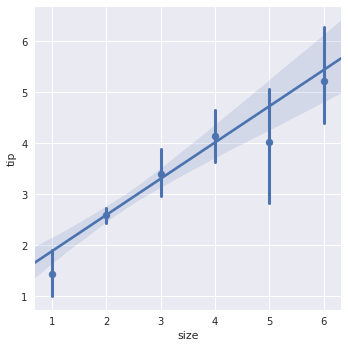

In [62]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>`_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

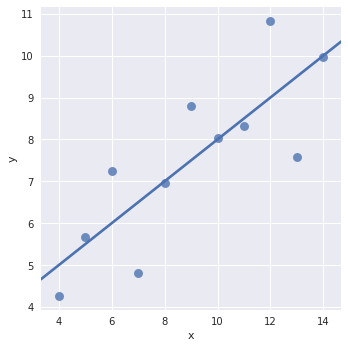

In [10]:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

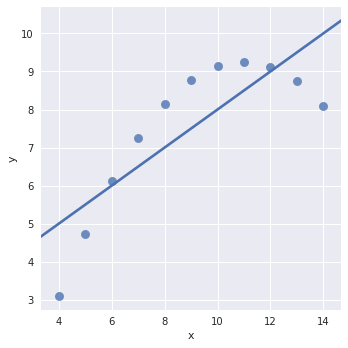

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

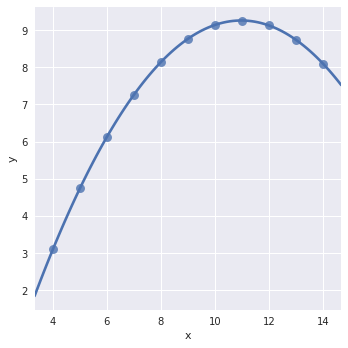

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

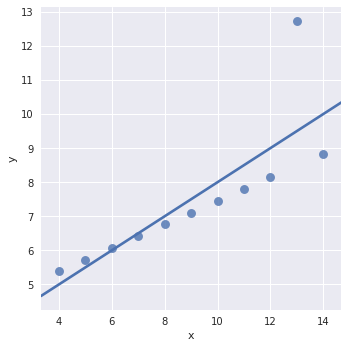

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

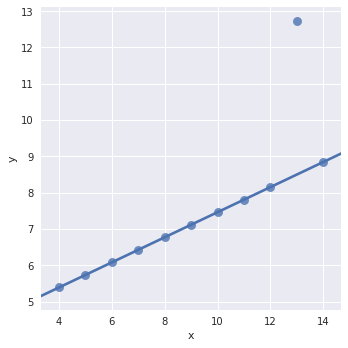

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between :func:`regplot` and :func:`lmplot` appears. While :func:`regplot` always shows a single relationship, :func:`lmplot` combines :func:`regplot` with :class:`FacetGrid` to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

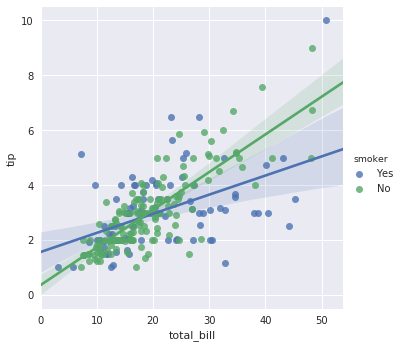

In [16]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

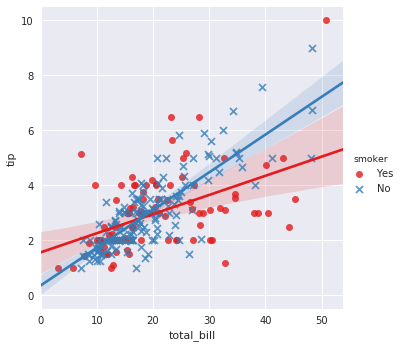

In [17]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

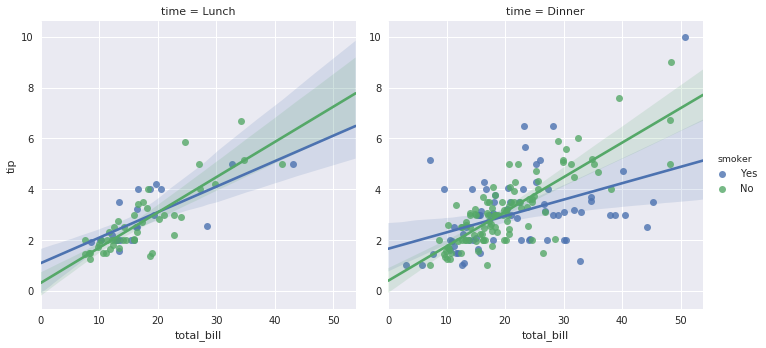

In [18]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

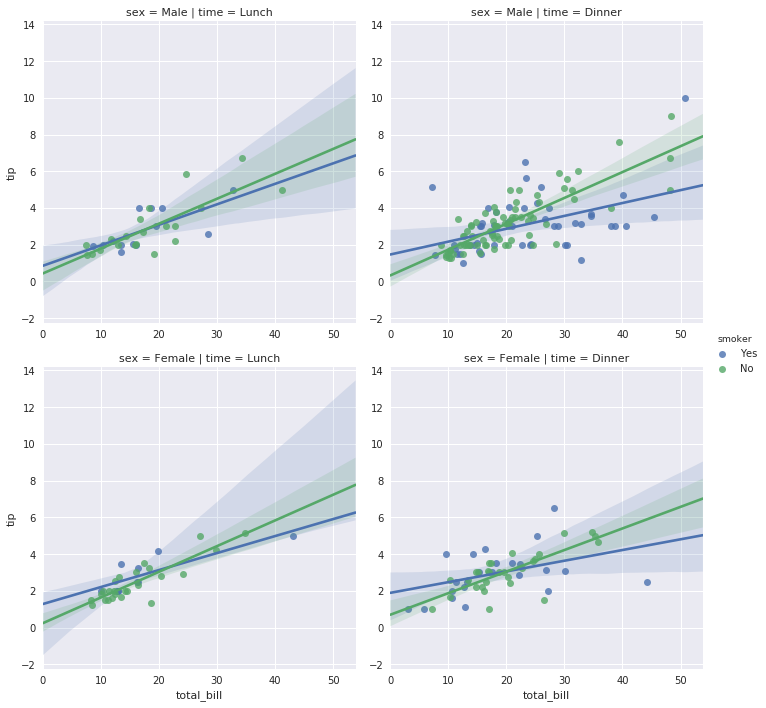

In [77]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use :func:`regplot` in the context of a larger, more complex plot. The first is the :func:`jointplot` function that we introduced in the :ref:`distributions tutorial <distribution_tutorial>`. In addition to the plot styles previously discussed, :func:`jointplot` can use :func:`regplot` to show the linear regression fit on the joint axes by passing ``kind="reg"``:

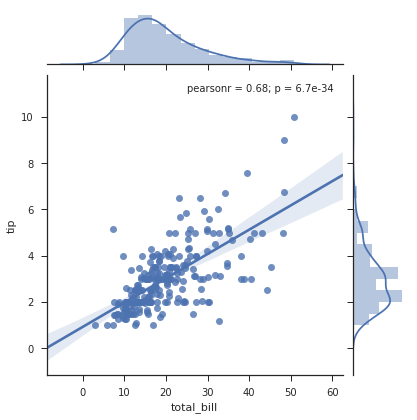

In [113]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

# Plotting on data-aware grids

When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either "lattice", or "trellis" plotting, and it is related to the idea of ["small multiples"](http://en.wikipedia.org/wiki/Small_multiple). It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

To use these features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls ["tidy" data](http://vita.had.co.nz/papers/tidy-data.pdf). In brief, that means your dataframe should be structured such that each column is a variable and each row is an observation.

For advanced use, you can use the objects discussed in this part of the tutorial directly, which will provide maximum flexibility. Some seaborn functions (such as :func:`lmplot`, :func:`factorplot`, and :func:`pairplot`) also use them behind the scenes. Unlike other seaborn functions that are "Axes-level" and draw onto specific (possibly already-existing) matplotlib ``Axes`` without otherwise manipulating the figure, these higher-level functions create a figure when called and are generally more strict about how it gets set up. In some cases, arguments either to those functions or to the constructor of the class they rely on will provide a different interface attributes like the figure size, as in the case of :func:`lmplot` where you can set the height and aspect ratio for each facet rather than the overall size of the figure. Any function that uses one of these objects will always return it after plotting, though, and most of these objects have convenience methods for changing how the plot is drawn, often in a more abstract and easy way.

In [19]:
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

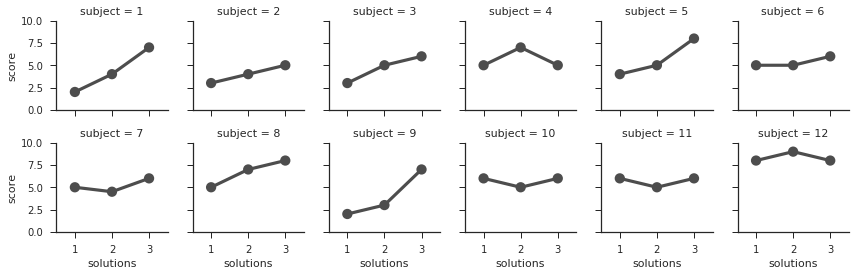

In [22]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=6, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);


Plotting pairwise relationships in a dataset
--------------------------------------------

:class:`PairGrid` also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a :class:`PairGrid`, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a "scatterplot matrix", as this is the most common way to show each relationship, but :class:`PairGrid` is not limited to scatterplots.

It's important to understand the differences between a :class:`FacetGrid` and a :class:`PairGrid`. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using :class:`PairGrid` can give you a very quick, very high-level summary of interesting relationships in your dataset.

The basic usage of the class is very similar to :class:`FacetGrid`. First you initialize the grid, then you pass plotting function to a ``map`` method and it will be called on each subplot. There is also a companion function, :func:`pairplot` that trades off some flexibility for faster plotting.


:class:`PairGrid` is flexible, but to take a quick look at a dataset, it can be easier to use :func:`pairplot`. This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

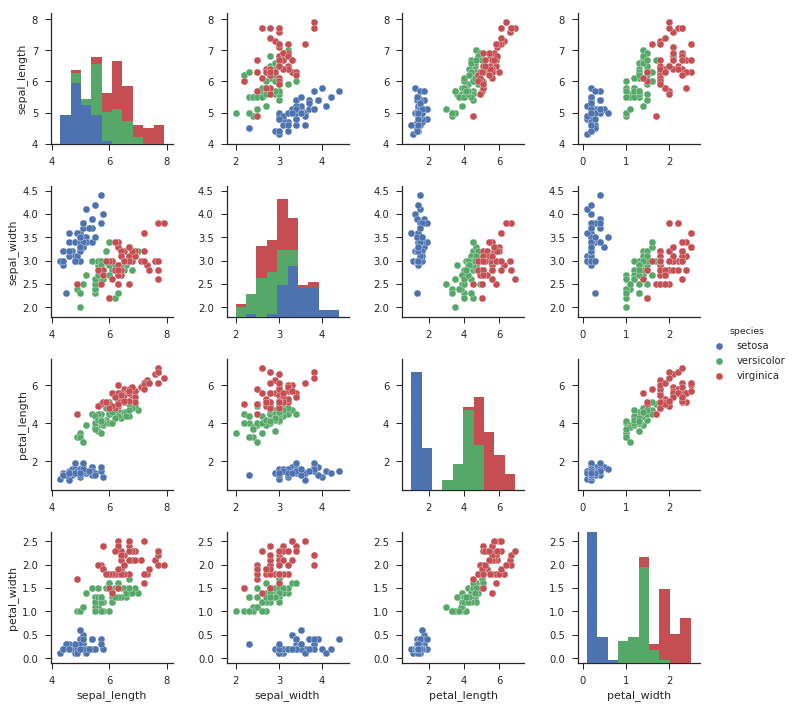

In [23]:
sns.pairplot(iris, hue="species", size=2.5);

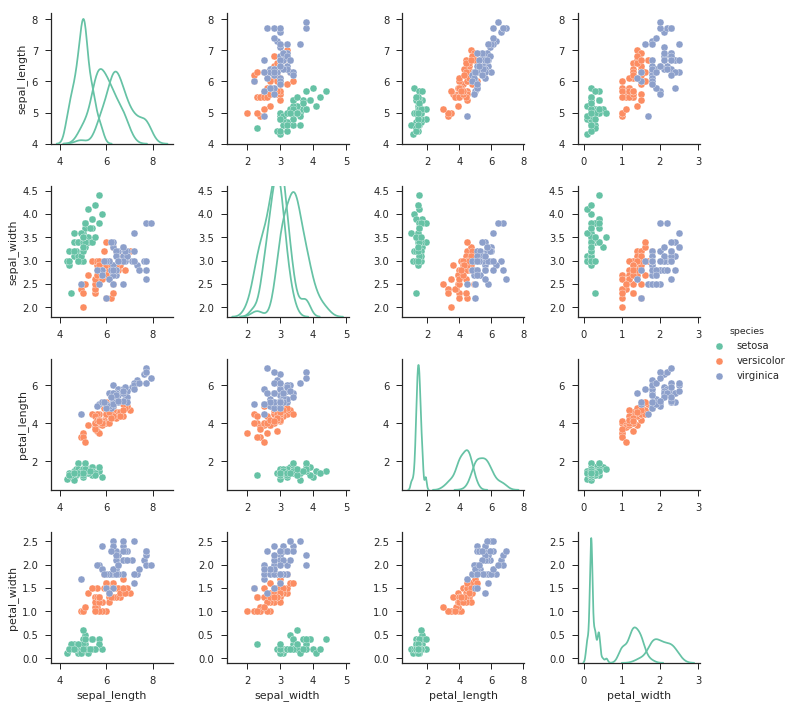

In [111]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)